<a href="https://colab.research.google.com/github/Y07-assine/Fraud-detection-on-credit-card-datasets/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the needed dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Data collection and processing

In [ ]:
df = pd.read_csv('/content/creditcardx.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(273262, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273262 entries, 0 to 273261
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    273262 non-null  float64
 1   V1      273262 non-null  float64
 2   V2      273262 non-null  float64
 3   V3      273262 non-null  float64
 4   V4      273262 non-null  float64
 5   V5      273262 non-null  float64
 6   V6      273262 non-null  float64
 7   V7      273262 non-null  float64
 8   V8      273262 non-null  float64
 9   V9      273262 non-null  float64
 10  V10     273262 non-null  float64
 11  V11     273262 non-null  float64
 12  V12     273262 non-null  float64
 13  V13     273262 non-null  float64
 14  V14     273262 non-null  float64
 15  V15     273261 non-null  float64
 16  V16     273261 non-null  float64
 17  V17     273261 non-null  float64
 18  V18     273261 non-null  float64
 19  V19     273261 non-null  float64
 20  V20     273261 non-null  float64
 21  V21     27

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273262.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000,273261.000000
mean,91689.494416,-0.005661,-0.011566,0.031749,0.006925,-0.012742,0.005653,-0.005842,-0.000684,-0.000193,0.001198,0.013028,-0.010288,0.001192,0.004324,0.007956,-0.000912,0.002608,-0.004630,-0.000814,0.000901,-0.000234,-0.003195,-0.001665,0.000393,0.006193,0.000533,-0.000148,0.000419,89.176571,0.001764
std,45928.226716,1.957568,1.653789,1.510507,1.416367,1.365857,1.324647,1.218181,1.193695,1.102257,1.086008,1.023233,1.009416,1.000119,0.960535,0.919301,0.878725,0.853205,0.840168,0.815327,0.770396,0.737152,0.723127,0.629038,0.605856,0.519090,0.483242,0.398821,0.331547,247.094518,0.041962
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,52930.500000,-0.921514,-0.606329,-0.841474,-0.846800,-0.704854,-0.762333,-0.558301,-0.206831,-0.648007,-0.530990,-0.749165,-0.416265,-0.651047,-0.419015,-0.576658,-0.470994,-0.479163,-0.502084,-0.460665,-0.210674,-0.227212,-0.539137,-0.162686,-0.353296,-0.309694,-0.327807,-0.070674,-0.052197,5.900000,0.000000
50%,81799.500000,0.019750,0.060154,0.218640,-0.007932,-0.069185,-0.266656,0.033290,0.023732,-0.053002,-0.090770,-0.022366,0.133090,-0.013547,0.052840,0.060713,0.065182,-0.062309,-0.008494,0.002292,-0.060880,-0.029935,0.004605,-0.013175,0.042383,0.027731,-0.054306,0.001580,0.012000,22.500000,0.000000
75%,135516.000000,1.300409,0.791299,1.051607,0.759570,0.596475,0.405850,0.561713,0.326826,0.600892,0.458054,0.755651,0.615033,0.664822,0.494988,0.661996,0.525268,0.401437,0.496437,0.461350,0.135069,0.183407,0.519566,0.144295,0.437124,0.354752,0.243041,0.089967,0.077859,78.480000,0.000000
max,165515.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273256,165512.0,2.112161,0.634790,-2.824978,0.479637,1.246214,-0.938597,0.372205,-0.325458,0.392006,-1.235666,-0.316913,0.023530,1.153543,-2.797518,1.057270,0.969426,1.414490,1.425721,-0.410871,-0.033346,0.054117,0.373839,-0.116593,-0.155794,0.411437,-0.093794,0.020839,0.009484,1.00,0.0
273257,165513.0,1.830989,-0.630360,-0.646853,0.036445,0.326548,1.908515,-1.009189,0.648663,1.196528,-0.150807,1.030070,1.327961,0.192393,0.023884,0.653168,-0.525779,-0.040740,-0.596065,-0.925824,-0.257159,0.302269,1.171827,0.179869,-0.701483,-0.280690,-0.143371,0.086322,-0.054447,11.50,0.0
273258,165513.0,1.917591,-0.693965,-0.506634,0.150761,-0.332283,0.533064,-0.686220,0.128380,1.749460,-0.432709,-1.638790,0.989558,1.015005,-0.729064,-0.461348,-0.110025,-0.373797,-0.374011,0.545870,-0.023555,-0.242130,-0.449139,0.241622,0.050633,-0.298647,-0.202327,0.024584,-0.026205,57.92,0.0
273259,165513.0,-2.933089,1.420331,-3.399109,-0.330058,0.628004,-1.170968,0.380892,1.236554,-0.840858,-1.082881,-1.639641,0.760455,1.487163,0.015868,-0.682476,0.490138,0.969001,0.104759,0.017444,-0.384274,0.007433,0.244500,0.016413,0.068445,0.696759,0.707520,0.155874,-0.538284,26.00,0.0


In [ ]:
df['Class'].value_counts()

0.0    272779
1.0       482
Name: Class, dtype: int64

We have an imbalanced dataset

Destribution of transaction time/amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


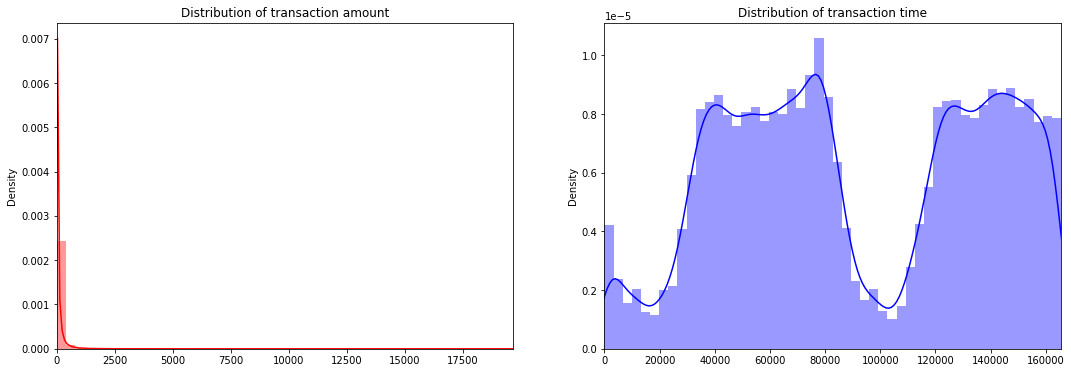

In [ ]:

time = df['Time'].values
amount = df['Amount'].values
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.distplot(amount, ax=ax[0],color='r')
sns.distplot(time, ax=ax[1],color='b')


ax[0].set_title('Distribution of transaction amount')
ax[0].set_xlim([min(amount),max(amount)])
ax[1].set_title('Distribution of transaction time')
ax[1].set_xlim([min(time),max(time)])

plt.show()

# Scaling and distributing

This means that we're transforming the data so that it fits within a specific scale, like 0-100 or 0-1. 

Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)




In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.751447,-0.990483,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.272940,-0.990483,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.907137,-0.990470,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.391568,-0.990470,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.654312,-0.990458,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0




*   Spliting the original data




we want to test our models on the original testing set not on the testing set created by Random UnderSampling technique

In [ ]:
df = df.dropna()

In [ ]:
df['Class'].value_counts()

0.0    272779
1.0       482
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']


In [ ]:
X.isnull().sum()

scaled_amount    0
scaled_time      0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
dtype: int64

In [ ]:
#This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.


skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30398  30442  30473 ... 273258 273259 273260] Test: [    0     1     2 ... 54708 54709 54710]
Train: [     0      1      2 ... 273258 273259 273260] Test: [ 30398  30442  30473 ... 109348 109349 109350]
Train: [     0      1      2 ... 273258 273259 273260] Test: [ 79835  79874  79883 ... 164023 164024 164025]
Train: [     0      1      2 ... 273258 273259 273260] Test: [149587 149600 149869 ... 218625 218626 218627]
Train: [     0      1      2 ... 218625 218626 218627] Test: [201098 201601 203324 ... 273258 273259 273260]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99823886 0.00176114]
[0.99822513 0.00177487]




*   Random Under-Sampling




 we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio)

In [ ]:
# shuffle the data before creating the subsamples

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:482]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
230242,1.490907,0.780397,1.899904,-1.047885,-1.286630,-0.416467,-0.770646,-0.981245,-0.212072,-0.287650,-0.860705,1.092171,0.844606,0.512579,0.163730,0.497324,-0.168983,-1.240613,-0.437877,1.602056,-0.800188,-0.354446,-0.005357,0.253318,0.019979,0.113989,-0.161217,0.757167,-0.088867,-0.052003,0.0
253236,0.088179,0.900358,2.150617,-0.056796,-2.383864,0.016803,0.734580,-1.152764,0.655500,-0.462599,0.244636,0.233709,-1.735115,-0.741207,-0.919810,0.879784,0.473283,0.013243,-0.606512,-0.238812,0.391204,-0.206708,0.007970,0.029262,-0.095427,-0.962534,0.306098,0.792512,-0.137210,-0.090730,0.0
160226,-0.296225,0.379855,-0.257851,0.884899,0.578212,-0.505407,0.728406,-0.202499,0.847914,0.026271,-0.460442,-0.543353,0.786711,0.063958,-0.993832,0.826546,0.475759,-0.475642,-0.400710,0.879775,0.833861,-0.068291,0.377883,1.109983,-0.447252,0.718390,0.315960,-0.317588,0.134330,0.122961,0.0
27611,0.041885,-0.571220,-1.071595,0.286577,1.662924,-0.139618,1.047805,1.689905,0.378900,0.486951,-0.080164,-0.164004,1.900575,1.030932,-0.456825,-0.085990,0.042234,-1.564813,0.902823,-1.986928,-0.849571,0.009626,-0.059707,0.352596,0.104520,-0.987151,-0.357864,0.316035,0.101429,-0.065414,0.0
101045,-0.254891,-0.170641,1.209203,-1.242710,1.697445,-0.274914,-1.969420,0.755780,-1.836061,0.580548,0.669453,0.431554,0.676295,-0.080693,-1.681675,-0.846413,-1.665649,0.475961,1.083376,-1.193910,0.853588,-0.097994,0.214165,0.902288,-0.030373,0.251751,0.296969,-0.040521,0.089052,0.012313,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


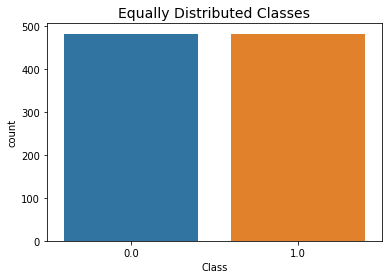

In [ ]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Our dataframe correctly balanced**

Correlation Matrices

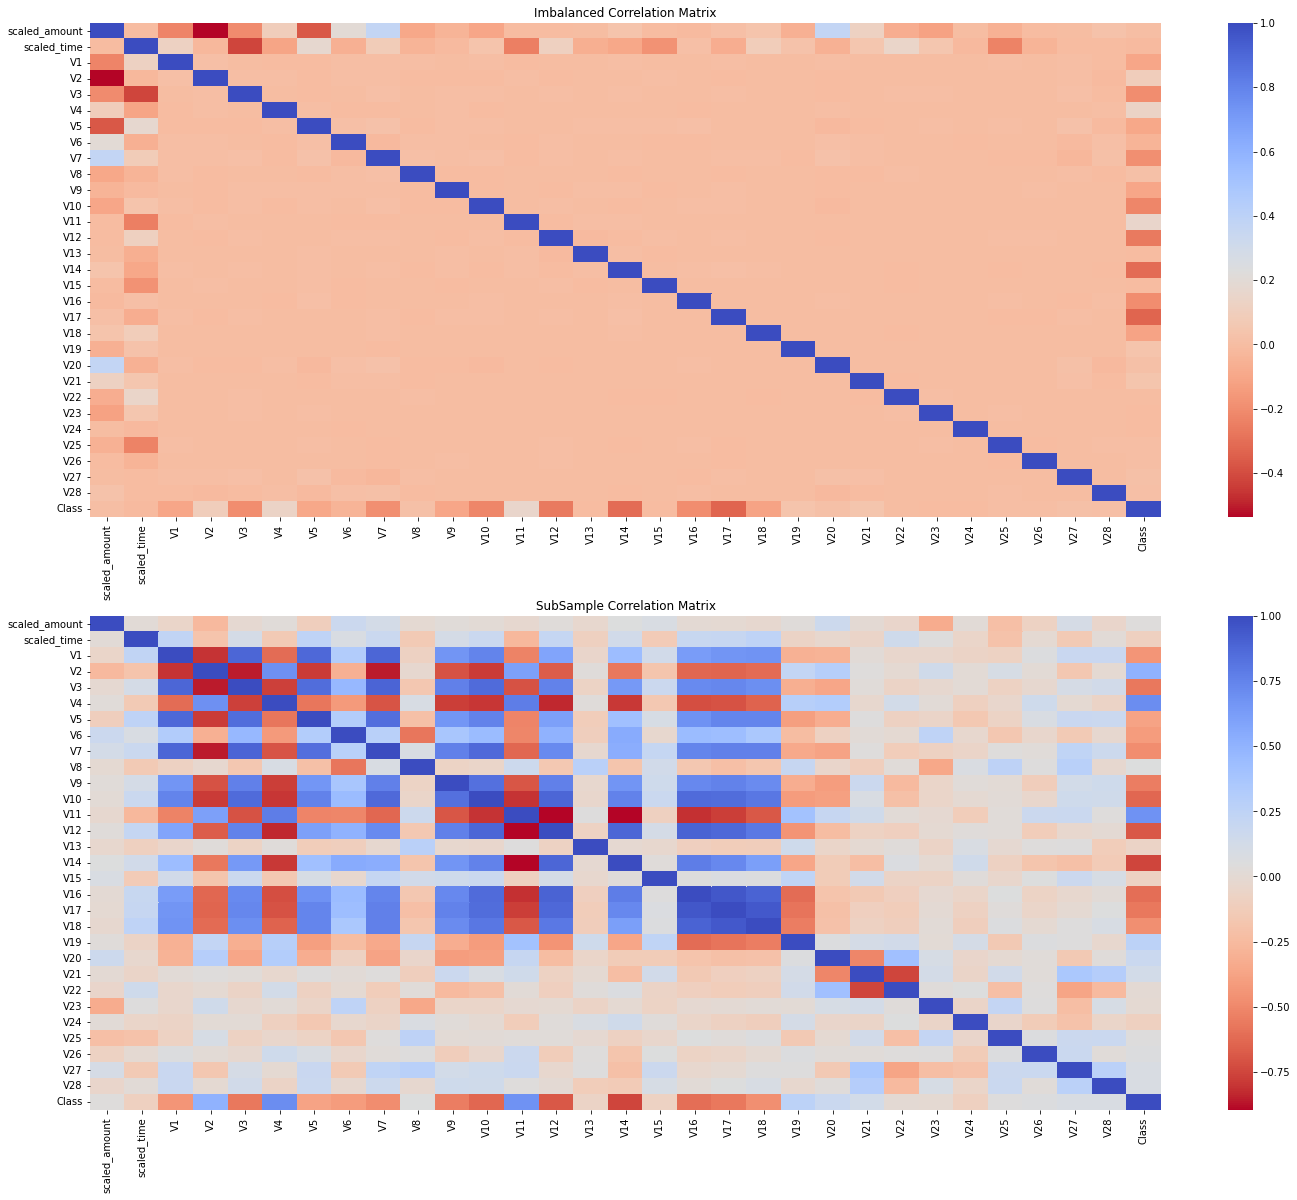

In [ ]:
fig ,ax = plt.subplots(2,1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20},ax=ax[0])
ax[0].set_title("Imbalanced Correlation Matrix")

Sub_corr = new_df.corr()
sns.heatmap(Sub_corr, cmap='coolwarm_r', annot_kws={'size':20},ax=ax[1])
ax[1].set_title("SubSample Correlation Matrix")

plt.show()

BoxPlots

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

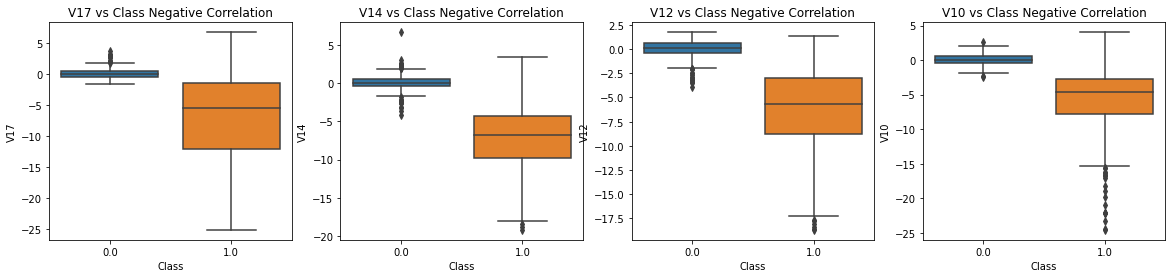

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class',y="V17",data=new_df,ax=ax[0])
ax[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class',y="V14",data=new_df,ax=ax[1])
ax[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y="V12",data=new_df,ax=ax[2])
ax[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y="V10",data=new_df,ax=ax[3])
ax[3].set_title('V10 vs Class Negative Correlation')


Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

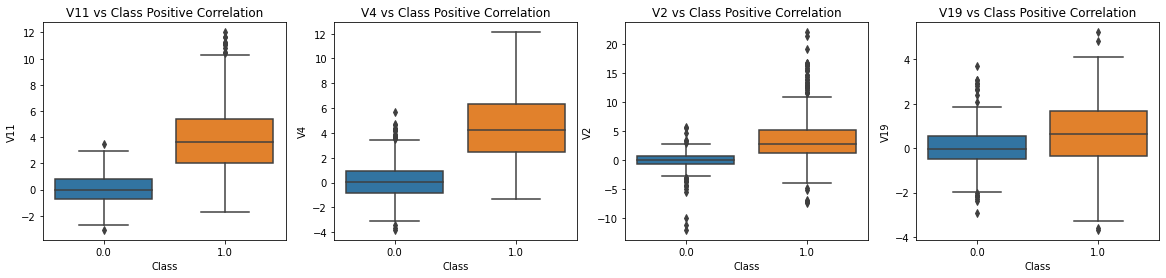

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class',y="V11",data=new_df,ax=ax[0])
ax[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class',y="V4",data=new_df,ax=ax[1])
ax[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x='Class',y="V2",data=new_df,ax=ax[2])
ax[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class',y="V19",data=new_df,ax=ax[3])
ax[3].set_title('V19 vs Class Positive Correlation')